The intention here is to review the work done classifying the test/input images. The classification run can take hours and be interrupted, so this just gathers everything and visualises it

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import random

from tensorflow.keras.utils import load_img 


def view_cluster(groups,cluster):
    plt.figure(figsize = (25,25))
    # gets the list of filenames for a cluster
    files = groups[cluster]
    # only allow up to 30 images to be shown at a time
    if len(files) > 60:
        print(f"Clipping cluster size from {len(files)} to 60")
        files = random.choices(files,k=60)

    # plot each image in the cluster
    for index, file in enumerate(files):
        plt.subplot(10,10,index+1)
        img = load_img(file)
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')

Now we need to load the groups, and view the clusters:

Clipping cluster size from 143406 to 60


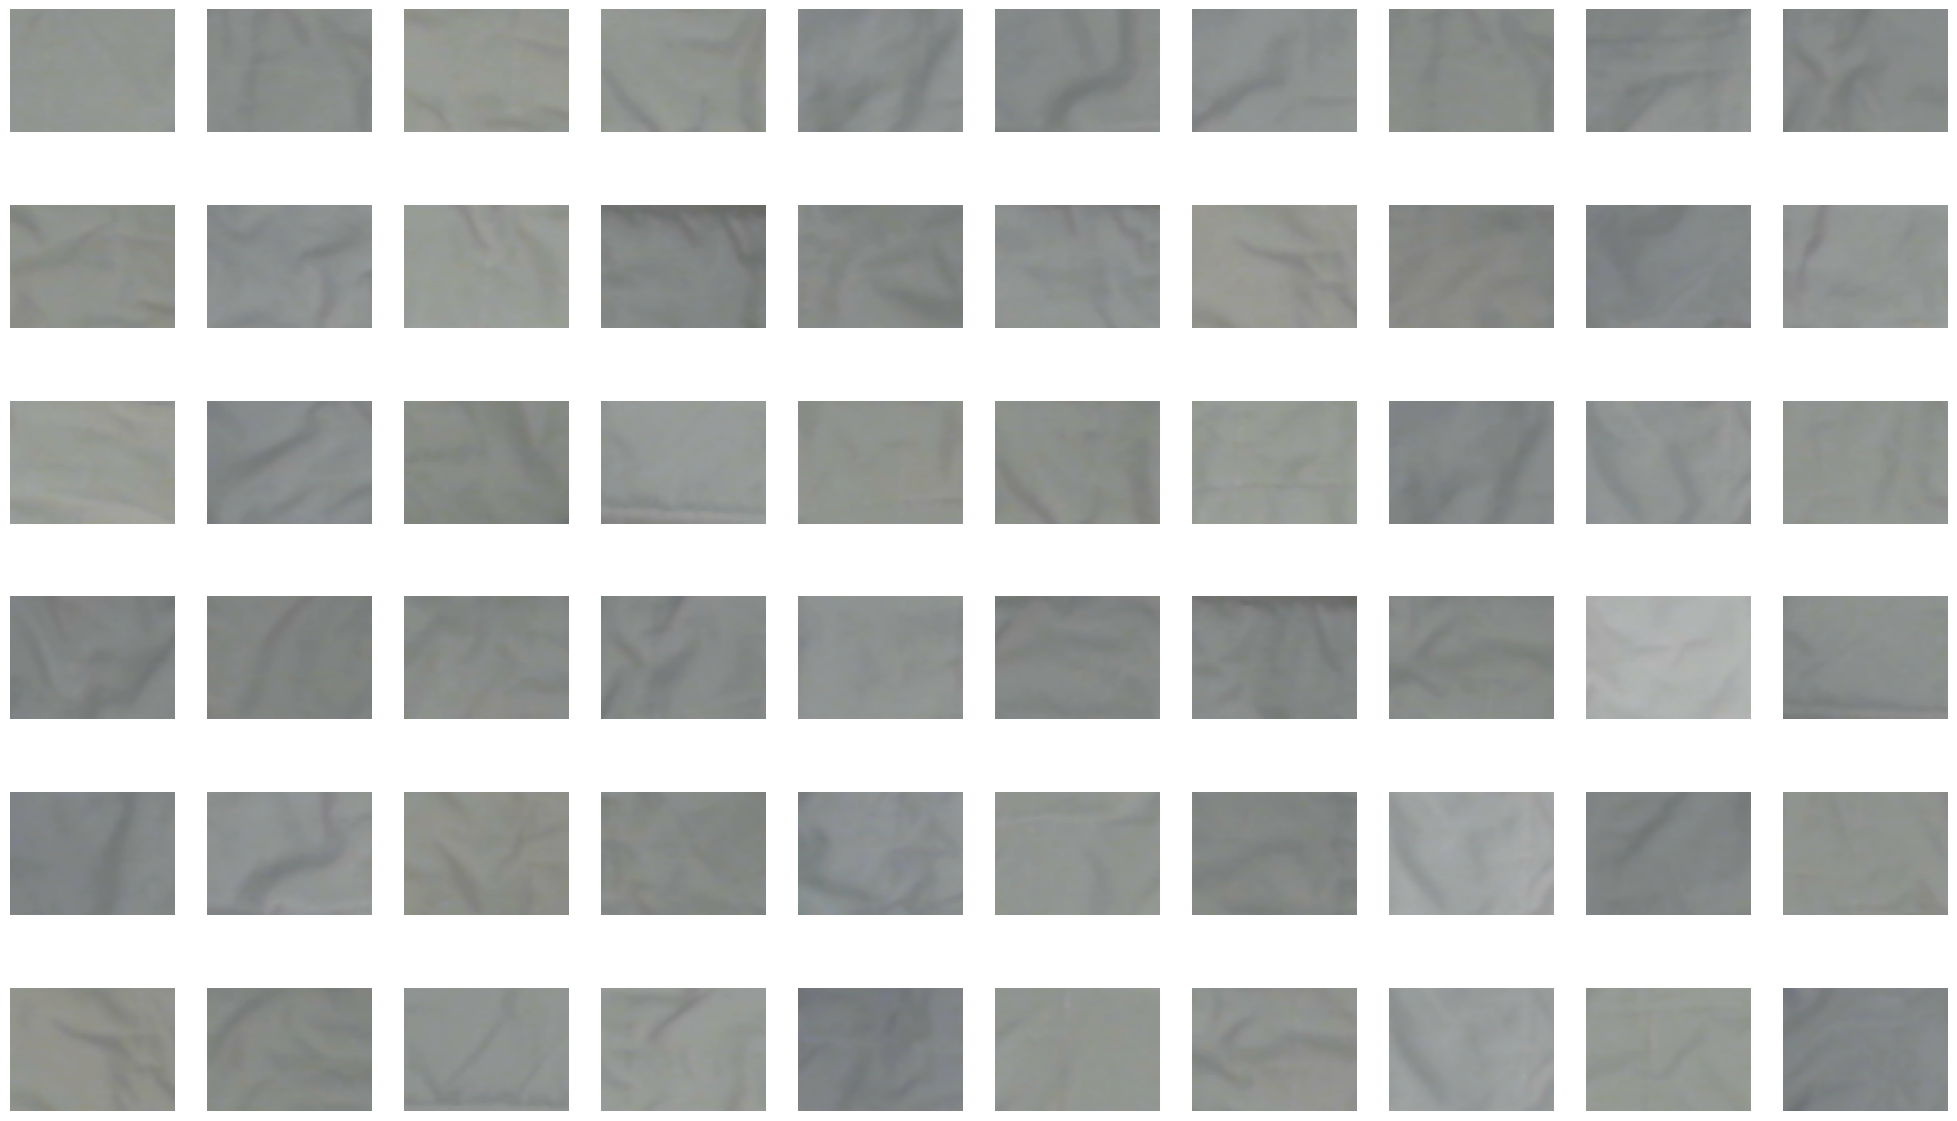

In [6]:
import pickle
with open(str("images/crab/groups.pickle"), 'rb') as handle:
    groups = pickle.load(handle)

view_cluster(groups,0)

Clipping cluster size from 20994 to 60


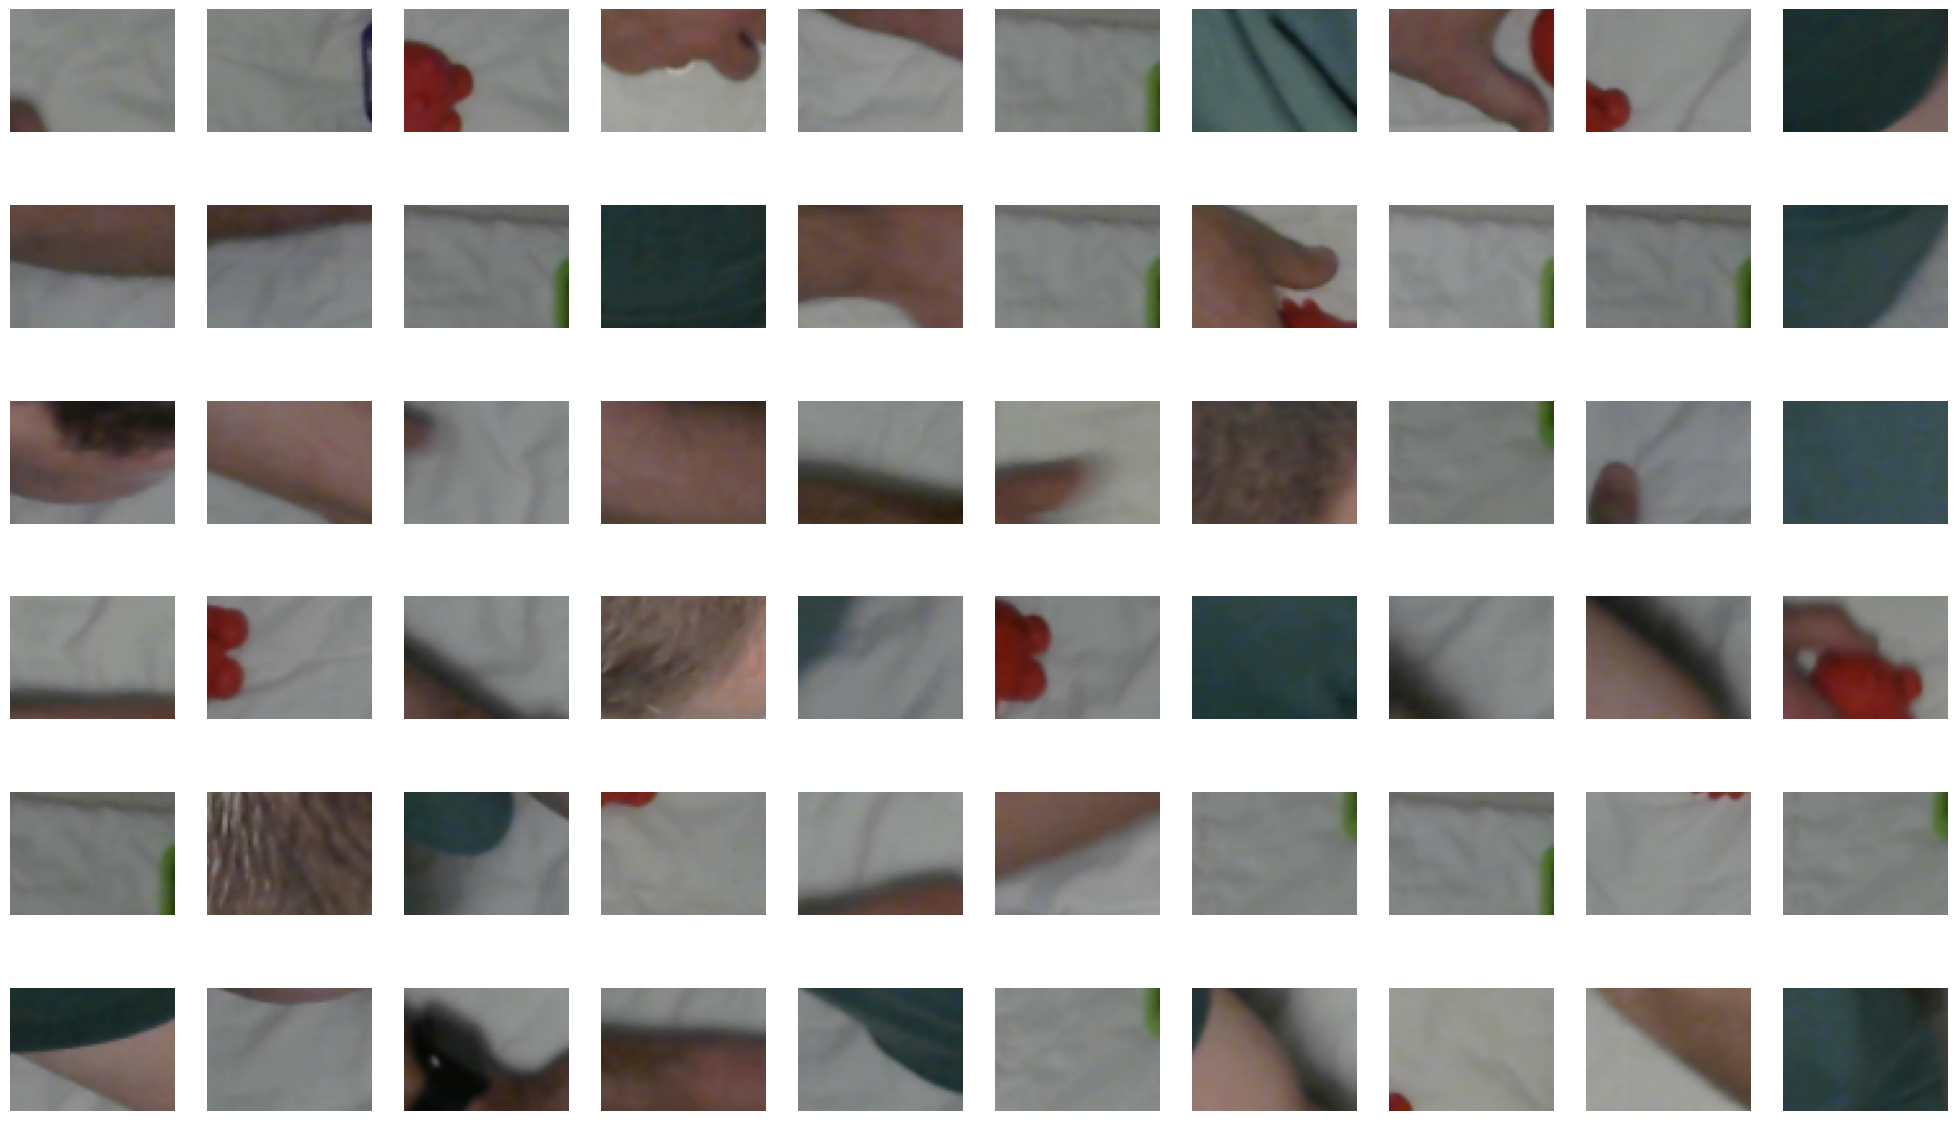

In [7]:
view_cluster(groups,1)

In [9]:
import pathlib
def remove_empty_directories(folder: pathlib.Path):
    for subdir in folder.iterdir():
        if subdir.is_dir():
            remove_empty_directories(subdir)  # Recursively remove empty directories inside this directory
            try:
                subdir.rmdir()  # Remove empty directory
                
            except OSError as e:
                pass

remove_empty_directories(pathlib.Path("images/"))